# TB Median


In [1]:
import pandas as pd
features_and_target = pd.read_csv('data_with_everything.csv')


In [2]:

features_and_target.columns

Index(['altmetric_id', 'tweet_id', 'tweet_url', 'tweet_post_date',
       'twitter_author_url', 'selected_quotes', 'twitter_author_description',
       'twitter_author_id', 'twitter_author_handle',
       'twitter_author_followers', 'twitter_author_name', 'paper_title',
       'paper_abstract', 'paper_doi', 'paper_pubdate', 'twitter_rt_count',
       'subjects', 'Publisher_subjects', 'Scopus_Subjects', 'Count_HashTags',
       'Abstract_Length', 'followers_count', 'author_count', 'title_Vader',
       'abstract_Vader', 'Tw_Vader_mean', 'Tw_Vader_median', 'title_TB',
       'abstract_TB', 'Tw_TB_mean', 'Tw_TB_median'],
      dtype='object')

In [3]:
final_score_list=[]
for val in features_and_target['Tw_TB_median']:
    if val > 0:
        final_score_list.append(1)
    elif val < 0:
        final_score_list.append(-1)
    else:
        final_score_list.append(0)

print(len(final_score_list))

features_and_target = features_and_target.assign(class_label_Tb_median=final_score_list)
 

148712


In [4]:
features_and_target.columns

Index(['altmetric_id', 'tweet_id', 'tweet_url', 'tweet_post_date',
       'twitter_author_url', 'selected_quotes', 'twitter_author_description',
       'twitter_author_id', 'twitter_author_handle',
       'twitter_author_followers', 'twitter_author_name', 'paper_title',
       'paper_abstract', 'paper_doi', 'paper_pubdate', 'twitter_rt_count',
       'subjects', 'Publisher_subjects', 'Scopus_Subjects', 'Count_HashTags',
       'Abstract_Length', 'followers_count', 'author_count', 'title_Vader',
       'abstract_Vader', 'Tw_Vader_mean', 'Tw_Vader_median', 'title_TB',
       'abstract_TB', 'Tw_TB_mean', 'Tw_TB_median', 'class_label_Tb_median'],
      dtype='object')

In [5]:

features_and_target_to_use = features_and_target[['Scopus_Subjects','title_TB','abstract_TB',\
                                                  'Count_HashTags','Abstract_Length','followers_count','author_count',\
                                                  'class_label_Tb_median']]

In [6]:
# observing the counts of positive and negative
from collections import Counter
tw_Tb_median_class_list =features_and_target_to_use['class_label_Tb_median'].tolist()
a = dict(Counter(tw_Tb_median_class_list))
print(a)

{0: 81498, 1: 53466, -1: 13748}


In [7]:
features_and_target_to_use.shape

(148712, 8)

In [8]:
# considering only +1 and -1
features_and_target_to_use_2_labels = features_and_target_to_use[features_and_target_to_use.class_label_Tb_median != 0]

In [9]:
features_and_target_to_use_2_labels.shape

(67214, 8)

In [10]:
# observing the counts of positive and negative
from collections import Counter
tw_Tb_median_class_list =features_and_target_to_use_2_labels['class_label_Tb_median'].tolist()
a = dict(Counter(tw_Tb_median_class_list))
print(a)

{1: 53466, -1: 13748}


In [11]:
features_and_target_to_use_2_labels.columns  = ['Scopus subjects', 'Title sentiment','Abstract sentiment', 'Hashtag count','Abstract length','Tweet reach','Author count','Tweet sentiment']

In [12]:
features_and_target_to_use_2_labels.columns

Index(['Scopus subjects', 'Title sentiment', 'Abstract sentiment',
       'Hashtag count', 'Abstract length', 'Tweet reach', 'Author count',
       'Tweet sentiment'],
      dtype='object')

In [13]:
features_and_target_to_use_2_labels

,Scopus subjects,Title sentiment,Abstract sentiment,Hashtag count,Abstract length,Tweet reach,Author count,Tweet sentiment
2,Health Sciences,0.2375,0.2111,0,939,2612,3.0,1
4,"Biochemistry, Genetics and Molecular Biology",0.0000,0.1696,4,998,3858,11.0,1
5,"Biochemistry, Genetics and Molecular Biology",0.0000,0.2536,6,1768,3907,11.0,1
15,Medicine,0.0000,-0.1147,1,1726,641,3.0,1
17,"Biochemistry, Genetics and Molecular Biology",0.1667,0.1237,1,1128,2524,8.0,1
19,Physical Sciences,0.4550,0.1120,1,1754,9376,3.0,1
26,"Biochemistry, Genetics and Molecular Biology",0.5000,0.0000,0,63,684,3.0,1
27,Medicine,0.0000,0.0529,2,1526,2060,12.0,1
28,Medicine,0.1000,0.1750,1,402,220,6.0,1
30,Medicine,0.1000,0.0866,1,2360,2792,8.0,1


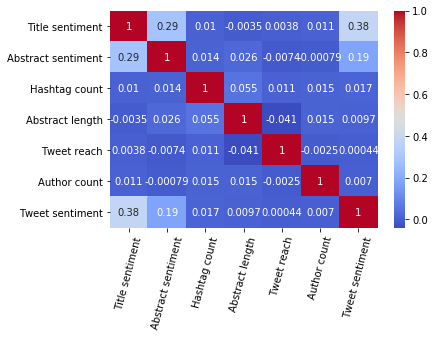

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
corrMatrix = features_and_target_to_use_2_labels.corr()
sn.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=75)
plt.show()

In [26]:
''''
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(features_and_target_to_use_2_labels, hue='class_label_Tb_median')
'''

"'\n# Seaborn visualization library\nimport seaborn as sns\n# Create the default pairplot\nsns.pairplot(features_and_target_to_use_2_labels, hue='class_label_Tb_median')\n"

Standard scaling

In [16]:
print(features_and_target_to_use_2_labels['Scopus subjects'].unique())

print(len(features_and_target_to_use_2_labels['Scopus subjects'].unique()))

['Health Sciences' 'Biochemistry, Genetics and Molecular Biology'
 'Medicine' 'Physical Sciences' 'Veterinary' 'Psychology' 'General'
 'Environmental Science' 'Life Sciences'
 'Agricultural and Biological Sciences' 'Chemical Engineering' 'Nursing'
 'Social Sciences' 'Health Professions' 'Materials Science'
 'Arts and Humanities' 'Physics and Astronomy' 'Chemistry' 'Dentistry'
 'Pharmacology, Toxicology and Pharmaceutics' 'Mathematics'
 'Immunology and Microbiology' 'Energy' 'Engineering'
 'Business, Management and Accounting']
25


In [18]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)




# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_split=250)
DT.fit(X_train, y_train)

# Predicting the Test set results
y_predDT = DT.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predDT)

import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predDT))
print('Precision',sklearn.metrics.precision_score(y_test, y_predDT))
print('Recall',sklearn.metrics.recall_score(y_test, y_predDT))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predDT))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = DT, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion': ["gini"], 'max_depth': [1,2,3,14,15], 'min_samples_split': [4,6,8,300,450,600]},
               {'criterion': ["entropy"], 'max_depth': [1,2,13,14,15], 'min_samples_split': [4,6,250,425,450,475,575,600]}]
grid_search = GridSearchCV(estimator = DT,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


from sklearn.metrics import classification_report
report =classification_report(y_test, y_predDT)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()

print('feature importances')
print(features_and_target_to_use_2_labels.columns)
print(DT.feature_importances_)
print()

C:\Users\syedm\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\syedm\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
Using TensorFlow backend.


Frequency of unique values of the said array:
[[   -1     1]
 [13748 53466]]
Frequency of unique values of the said array:
[[   -1     1]
 [53466 53466]]
Accuracy 0.8894188058166176
Precision 0.8588439808778792
Recall 0.9302391263415553
F-1 score 0.8931170063723053

confusion matrix
[[9141 1624]
 [ 741 9881]]

accuracies mean 0.8889823973668417
accuracies with 2 SD 0.006530835996197413

Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  2.2min finished



classification report
              precision    recall  f1-score   support

          -1       0.93      0.85      0.89     10765
           1       0.86      0.93      0.89     10622

    accuracy                           0.89     21387
   macro avg       0.89      0.89      0.89     21387
weighted avg       0.89      0.89      0.89     21387


best accuracy 0.8891109942135718
best parameters
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 250}

feature importances
Index(['Scopus subjects', 'Title sentiment', 'Abstract sentiment',
       'Hashtag count', 'Abstract length', 'Tweet reach', 'Author count',
       'Tweet sentiment'],
      dtype='object')
[6.69697758e-04 0.00000000e+00 6.91317675e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.07476868e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.76992096e-04 0.00000000e+00
 1.29007234e-02 0.00000000e+00 2.77342098e-03 0.00000000e+00
 0.00000000e+00 1.54760698e-01 0.00000000e+00 0.00000000e+00
 2.64880305e-03 

In [48]:
importances[indices[:10]]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
len(indices)

31

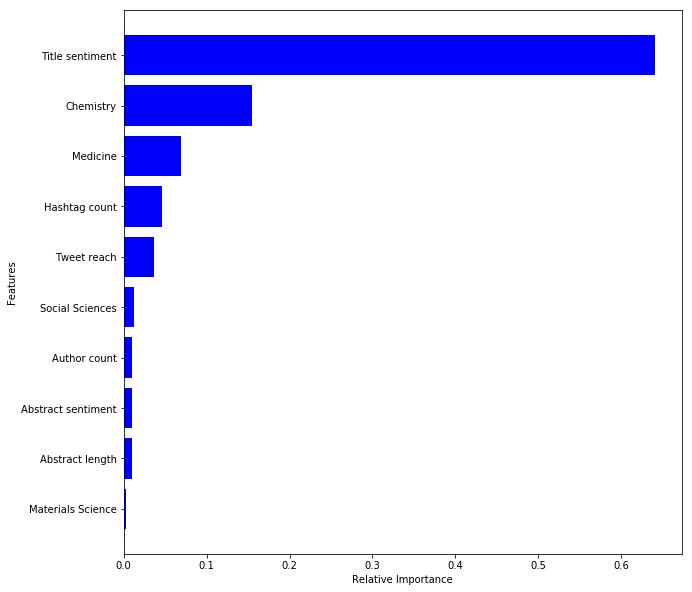

"\nplt.figure(1)\nplt.title('Feature Importances')\nplt.barh(range(len(indices)), importances[indices], color='b', align='center')\nplt.yticks(range(len(indices)), features[indices])\nplt.xlabel('Relative Importance')\n"

In [94]:
import numpy as np
features=['Health Sciences', 'Biochemistry, Genetics and Molecular Biology',
 'Medicine' ,'Physical Sciences', 'Veterinary', 'Psychology', 'General',
 'Environmental Science', 'Life Sciences',
 'Agricultural and Biological Sciences', 'Chemical Engineering', 'Nursing',
 'Social Sciences', 'Health Professions', 'Materials Science',
 'Arts and Humanities' ,'Physics and Astronomy', 'Chemistry', 'Dentistry',
 'Pharmacology, Toxicology and Pharmaceutics', 'Mathematics',
 'Immunology and Microbiology', 'Energy', 'Engineering',
 'Business, Management and Accounting', 'Title sentiment', 'Abstract sentiment',
       'Hashtag count', 'Abstract length', 'Tweet reach', 'Author count',
       ]
importances = DT.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))

#plt.title('Feature Importances')

'''
# correct
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
'''

# correct top 10
plt.barh(range(10), importances[indices[21:]], color='b', align='center')
plt.yticks(range(10), [features[i] for i in indices[21:]])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

'''
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
'''

In [17]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth= 20, min_samples_split=600, n_estimators=60)
RF.fit(X_train, y_train)

# Predicting the Test set results
y_predRF = RF.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predRF)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predRF))
print('Precision',sklearn.metrics.precision_score(y_test, y_predRF))
print('Recall',sklearn.metrics.recall_score(y_test, y_predRF))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predRF))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()


# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion': ["entropy"], 'max_depth': [10,20,40,60,80,100,120], 'min_samples_split': [20,40,60,80], 'n_estimators':[10,20,30,40], 'bootstrap':[False]}]
grid_search = GridSearchCV(estimator = RF,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


from sklearn.metrics import classification_report
report =classification_report(y_test, y_predRF)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()

print('feature importances')
print(features_and_target_to_use_2_labels.columns)
print(RF.feature_importances_)
print()


C:\Users\syedm\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\syedm\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
Using TensorFlow backend.


Frequency of unique values of the said array:
[[   -1     1]
 [13748 53466]]
Frequency of unique values of the said array:
[[   -1     1]
 [53466 53466]]
Accuracy 0.8948894188058166
Precision 0.8644038294168842
Recall 0.9350404820184522
F-1 score 0.8983357452966715

confusion matrix
[[9207 1558]
 [ 690 9932]]

accuracies mean 0.8971768554755488
accuracies with 2 SD 0.005003797754245813

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed: 67.7min finished



classification report
              precision    recall  f1-score   support

          -1       0.93      0.86      0.89     10765
           1       0.86      0.94      0.90     10622

    accuracy                           0.89     21387
   macro avg       0.90      0.90      0.89     21387
weighted avg       0.90      0.89      0.89     21387


best accuracy 0.9065754865860074
best parameters
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 100, 'min_samples_split': 20, 'n_estimators': 40}

feature importances
Index(['Scopus subjects', 'Title sentiment', 'Abstract sentiment',
       'Hashtag count', 'Abstract length', 'Tweet reach', 'Author count',
       'Tweet sentiment'],
      dtype='object')
[3.87979057e-03 2.27314132e-05 1.15161365e-01 2.69053400e-05
 1.61317940e-04 4.21015834e-05 4.22934712e-04 0.00000000e+00
 1.10799527e-07 2.17293204e-03 4.58398593e-03 2.93951162e-04
 3.69876301e-02 2.98806998e-07 1.45094515e-02 1.56083191e-03
 2.18287135e-05 1.23186299e-01 3.8838

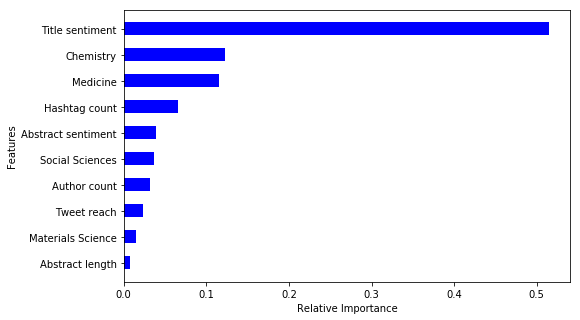

"\nplt.figure(1)\nplt.title('Feature Importances')\nplt.barh(range(len(indices)), importances[indices], color='b', align='center')\nplt.yticks(range(len(indices)), features[indices])\nplt.xlabel('Relative Importance')\n"

In [27]:
import numpy as np
features=['Health Sciences', 'Biochemistry, Genetics and Molecular Biology',
 'Medicine' ,'Physical Sciences', 'Veterinary', 'Psychology', 'General',
 'Environmental Science', 'Life Sciences',
 'Agricultural and Biological Sciences', 'Chemical Engineering', 'Nursing',
 'Social Sciences', 'Health Professions', 'Materials Science',
 'Arts and Humanities' ,'Physics and Astronomy', 'Chemistry', 'Dentistry',
 'Pharmacology, Toxicology and Pharmaceutics', 'Mathematics',
 'Immunology and Microbiology', 'Energy', 'Engineering',
 'Business, Management and Accounting', 'Title sentiment', 'Abstract sentiment',
       'Hashtag count', 'Abstract length', 'Tweet reach', 'Author count',
       ]
importances = RF.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,5))

#plt.title('Feature Importances')

'''
# correct
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
'''

# correct top 10
plt.barh(range(10), importances[indices[21:]], color='b', align='center', height =0.5)
plt.yticks(range(10), [features[i] for i in indices[21:]])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

'''
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
'''

In [ ]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


##Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.1, multi_class='ovr', penalty='l1', solver= 'liblinear')
LR.fit(X_train, y_train)
y_predLR = LR.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predLR)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predLR))
print('Precision',sklearn.metrics.precision_score(y_test, y_predLR))
print('Recall',sklearn.metrics.recall_score(y_test, y_predLR))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predLR))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 10)
accuracies.mean()

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty': ["l1"], 'C': [0.1,0.2,0.5,0.8,1,1.2,1.4], 'solver':['liblinear','saga'], 'multi_class':['ovr']},
             {'penalty': ["l2"], 'C': [0.1,0.2,0.5,0.8,1,1.2,1.4], 'solver':['newton-cg','lbfgs','sag'], 'multi_class':['ovr', 'multinomial']}
             ]
grid_search = GridSearchCV(estimator = LR,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

from sklearn.metrics import classification_report
report =classification_report(y_test, y_predLR)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()


In [ ]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

# Predicting the Test set results
y_predNB = NB.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predNB)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predNB))
print('Precision',sklearn.metrics.precision_score(y_test, y_predNB))
print('Recall',sklearn.metrics.recall_score(y_test, y_predNB))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predNB))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = NB, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

from sklearn.metrics import classification_report
report =classification_report(y_test, y_predNB)

print()
print('classification report')
print(report)
print()


In [ ]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 160, algorithm= 'auto')
KNN.fit(X_train, y_train)

# Predicting the Test set results
y_predKNN = KNN.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predKNN)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predKNN))
print('Precision',sklearn.metrics.precision_score(y_test, y_predKNN))
print('Recall',sklearn.metrics.recall_score(y_test, y_predKNN))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predKNN))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = KNN, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'n_neighbors': [5,10,20,25,30,40,50,100,120,140,160,180,200,220,240], 'algorithm': ['ball_tree','kd_tree']}]
grid_search = GridSearchCV(estimator = KNN,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


from sklearn.metrics import classification_report
report =classification_report(y_test, y_predKNN)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()


/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
Using TensorFlow backend.


Frequency of unique values of the said array:
[[   -1     1]
 [13748 53466]]
Frequency of unique values of the said array:
[[   -1     1]
 [53466 53466]]
Accuracy 0.8002057324542947
Precision 0.7334362820795647
Recall 0.9389945396347203
F-1 score 0.8235828413360307

confusion matrix
[[7140 3625]
 [ 648 9974]]

accuracies mean 0.8000584407062687
accuracies with 2 SD 0.005296926158776378

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 25.2min


In [ ]:
"""PLOTTING"""

from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(0).clf()

plt.figure(figsize=(7,7))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

x = [0.0, 1.0]
plt.plot(x, x, linestyle='dashed', color='red', linewidth=2, label='random')

#RF
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predRF)
auc = metrics.roc_auc_score(y_test, y_predRF)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc)[:5])

#DT
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predDT)
auc = metrics.roc_auc_score(y_test, y_predDT)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc)[:5])

#KNN
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predKNN)
auc = metrics.roc_auc_score(y_test, y_predKNN)
plt.plot(fpr,tpr,label="KNN, auc="+str(auc)[:5])

#LR
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predLR)
auc = metrics.roc_auc_score(y_test, y_predLR)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc)[:5])

#NB
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predNB)
auc = metrics.roc_auc_score(y_test, y_predNB)
plt.plot(fpr,tpr,label="Naive Bayes, auc="+str(auc)[:5])

plt.legend(loc='lower right')

plt.show()